# **BUILDING MODELS**

Having analysed, cleaned and split the dataset, mo

    1. Split the Raw Data Information
    2. Model 1
        A. Build Model
        B. Predictions of the Model
        C. Feature Importance from the Model
        D. Create Pickle File
    3. Model 2
        A. Build Model
        B. Predictions of the Model
        C. Feature Importance from the Model
        D. Create Pickle File

In [13]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

# **1. SPLIT THE RAW DATA INFORMATION**
The use of dummy data is a common practice to transform categorical data into a binary format, specifically 0’s and 1’s. This transformation assists with  easier quantification and comparisons in future models. For instance, consider the *‘Gender’* attribute, which includes **‘Male’** and **‘Female’** categories. By employing the ‘dummies’ function from pandas, these categories are converted into binary form, where **‘Gender_Male’** is represented as **'1'** and **‘Gender_Female’** as **'0'**.

When it comes to splitting the data into training and testing sets, a typical weightage of **80% (0.8)** is assigned to the *training* dataset, while the remaining **20% (0.2)** is allocated to the *testing* dataset. Additionaly, to ensure the consistency of the train/test split across multiple executions of the code, **‘random_state=42’** is used. This guarantees that the same train/test split is reproduced every time the code is run, thereby ensuring reproducibility.

In [14]:
# Read Cleaned CSV Files
cleaned_raw_data = pd.read_csv('cleaned_raw_data.csv')
cleaned_raw_data_copy = cleaned_raw_data.copy()

# Define the independent variables (features) and the target variable
X = cleaned_raw_data_copy.drop('Loan_Status', axis=1)  # all columns except 'Loan_Status'
y = cleaned_raw_data_copy['Loan_Status']  # only 'Loan_Status' column

# Convert categorical variable in the X dataset(all columns except 'Loan_Status') into dummy variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create new DataFrames for training and testing sets
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Save the training and testing sets to CSV files
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

Now that we have our training and test data, we can move onto building the initial model.

===================================================================================

## **2. MODEL 1**

## A. Build the Model
A **Logistics Regression** model will be built using the train_data dataset and fit it to the model, whereas the test_data dataset will be used to predict the outcomes of the target attribute and compare the predictions to the actual answer to determin the accuracy of the model that was created.

In [15]:
# Create a Logistic Regression model and Fit the model with the training data
model1 = LogisticRegression()
model1.fit(X_train, y_train)

# Calculate the accuracy score for the predictions of the model
test_predictions = model1.predict(X_test)
print(f"Accuracy Score for Predictions: {accuracy_score(y_test,test_predictions)}")

Accuracy Score for Predictions: 0.7723577235772358


***Insight Gained:***

    - The model shows it can accurately predict 77.24% of the Loan_Status values correctly.

Cross validation will be used on the predictions generated by the model to check its validity.

#### **Cross Validation model 1**
Stratified K-Fold Cross Validation method is used. This variation of k-fold cross-validation is used when the target variable is imbalanced. It ensures that each fold is a good representative of the whole dataset. The average for all the iterated accuracy scores is calculated to determin the overall accuracy of the model.

In [16]:
# Perform Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=5)
cross_val_predictions = cross_val_predict(model1, X, y, cv=skf)

kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
i = 1
scores = [] 
for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.iloc[train_index], X.iloc[test_index]
    ytr, yvl = y.iloc[train_index], y.iloc[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    scores.append(score)
    print('accuracy_score:', score)
    i += 1

# Calculate the mean validation accuracy score
mean_score = np.mean(scores)
print(f"\nMean validation accuracy score: {mean_score}")


1 of kfold 5
accuracy_score: 0.7723577235772358

2 of kfold 5
accuracy_score: 0.7967479674796748

3 of kfold 5
accuracy_score: 0.7642276422764228

4 of kfold 5
accuracy_score: 0.8048780487804879

5 of kfold 5
accuracy_score: 0.7786885245901639

Mean validation accuracy score: 0.7833799813407971


***Insight Gained:***

    - The difference between the two accuracy scores can be attributed to the fact that cross-validation provides a 
      more robust measure of the model’s performance.
    - In cross-validation, the model is trained and tested on different subsets of the data, which helps to ensure 
      that the model’s performance is not overly dependent on the specific way the data was split into training and
      test sets.
    - The higher mean validation accuracy score suggests that the model’s performance may be slightly better than what
      was observed on the initial test set.

## B. Predictions of the Model
All the predictions generated from the first model are stored in CSV files

In [17]:
# Remove the data from the Logistic Regression model Predictions.csv file to prevent duplicate storage
open('Log_Reg_Mod1_Predictions.csv', 'w').close()
open('Log_Reg_Mod1_Cross_Validate_Predictions.csv', 'w').close()

# Save the predictions to a CSV file
predictions_df = pd.DataFrame(test_predictions, columns=['Predictions'])
predictions_df.index.names = ['Index']
predictions_df.to_csv('Log_Reg_Mod1_Predictions.csv', mode='a', header=True)

# Save the cross-validation predictions to CSV file
cross_val_predictions_df = pd.DataFrame(pred_test, columns=['Cross Validation Predictions'])
cross_val_predictions_df.index.names = ['Index']
cross_val_predictions_df.to_csv('Log_Reg_Mod1_Cross_Validate_Predictions.csv', mode='a', header=True)

# Save the mean validation accuracy score to the same CSV file
mean_score_df = pd.DataFrame([mean_score], columns=['Mean Validation Accuracy Score'])
mean_score_df.to_csv('Log_Reg_Mod1_Cross_Validate_Predictions.csv', mode='a', header=False)

## C. Feature Importance from the Model
Feature engineering transforms or combines raw data into a format that can be easily understood by machine learning models.
Creates predictive model features, also known as a dimensions or variables, to generate model predictions.
This highlights the most important patterns and relationships in the data, which then assists the machine learning model to learn from the data more effectively.

#### **Feature 1: Total Income**
*'Total_Income'* is the first feature that can be created. It is achieved through the addition of the *'Applicants_Income'* and the *'Coapplicant_Income'*. The Total_Income is then normalised to reduce the affects of the extreme values that could arise from the addition of the two attributes. A distribution chart is created to visually see the new feature and its distribution.

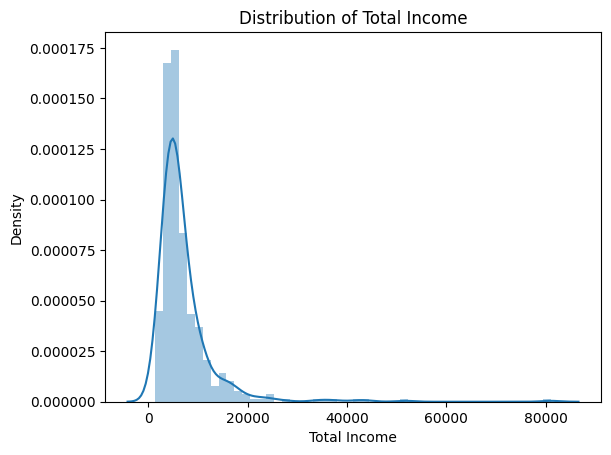

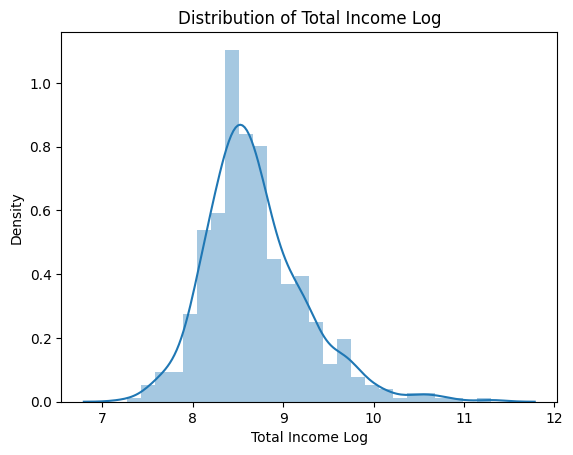

In [18]:
train_data['Total_Income']=train_data['Applicant_Income']+train_data['Coapplicant_Income']
test_data['Total_Income']=test_data['Applicant_Income']+test_data['Coapplicant_Income']

#Distribution normalization
sns.distplot(train_data['Total_Income'])
plt.title('Distribution of Total Income')
plt.xlabel('Total Income')
plt.ylabel('Density')
plt.show()

train_data['Total_Income_Log']=np.log(train_data['Total_Income'])
test_data['Total_Income_Log']=np.log(test_data['Total_Income'])

sns.distplot(train_data['Total_Income_Log'])
plt.title('Distribution of Total Income Log')
plt.xlabel('Total Income Log')
plt.ylabel('Density')
plt.show()

#### **Feature 2: Equated Monthly Installment (EMI)**
The second feature we can create is an *'EMI'* attribute. It can be created by dividing the *‘Loan_Amount’* by the *‘Loan_Amount_Term’*. This feature gets the monthly payment amount for a loan, given the total loan amount and the term of the loan. Overall this will give an indication of the individuals monthly financial obligation towards the loan.

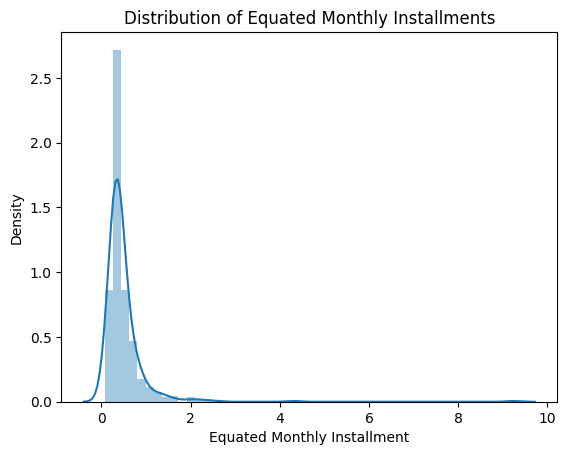

In [19]:
train_data['EMI']=train_data['Loan_Amount']/train_data['Loan_Amount_Term']
test_data['EMI'] = test_data['Loan_Amount']/test_data['Loan_Amount_Term']

sns.distplot(train_data['EMI'])
plt.title('Distribution of Equated Monthly Installments')
plt.xlabel('Equated Monthly Installment')
plt.ylabel('Density')
plt.show()

#### **Feature 3: Income After EMI**
Lastly, a feature called "Income After EMI" can be created by dividing the ‘Loan_Amount’ by the ‘Loan_Amount_Term’ to get the monthly payment amount for a loan. This will give an indication of the individuals monthly financial obligation towards the loan. The 'EMI' feature is multiplied with 1000 to make the unit equal to the 'Total_Income' unit.

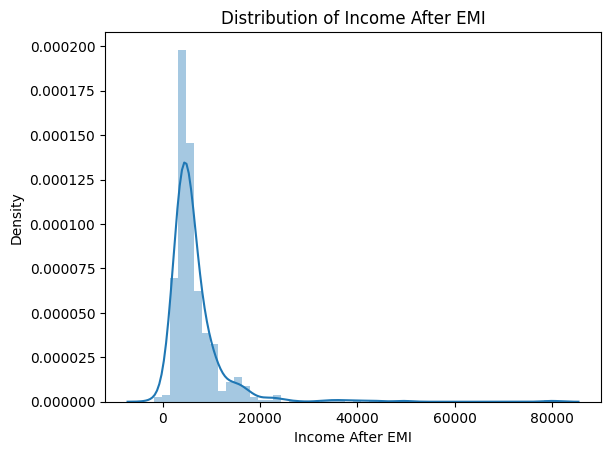

In [20]:
#Feature 3: Income After EMI
train_data['Income_After_EMI']=train_data['Total_Income']-(train_data['EMI']*1000)
test_data['Income_After_EMI']=test_data['Total_Income']-(test_data['EMI']*1000)

sns.distplot(train_data['Income_After_EMI'])
plt.title('Distribution of Income After EMI')
plt.xlabel('Income After EMI')
plt.ylabel('Density')
plt.show()

#### **Remove all features that created the new features**
The last step in the feature engineering section is to remove all the attributes used to create the new features. This is due to the high correlation between those old attributes and the new features. A Logistic regression model assumes that the attributes are not highly correlated. Therefore any excess noise in the datasets are removed. The new features are stored into a CSV file for use in the second model.

In [21]:
train_data=train_data.drop(['Applicant_Income','Coapplicant_Income','Loan_Amount','Loan_Amount_Term'],axis=1)
test_data=test_data.drop(['Applicant_Income','Coapplicant_Income','Loan_Amount','Loan_Amount_Term'],axis=1)

#Check to see if the attributes have been removed
print(f"Training Data Columns: {train_data.columns}\n")
print(f"Testing Data Columns:{test_data.columns}\n")

# Store new Features in CSV files
train_data.to_csv('Feature_Importance_train_data_NF_Model1.csv', index=False)
test_data.to_csv('Feature_Importance_test_data_NF_Model1.csv', index=False)

Training Data Columns: Index(['Dependents', 'Credit_History', 'Loan_Amount_Log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Status', 'Total_Income', 'Total_Income_Log', 'EMI',
       'Income_After_EMI'],
      dtype='object')

Testing Data Columns:Index(['Dependents', 'Credit_History', 'Loan_Amount_Log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Status', 'Total_Income', 'Total_Income_Log', 'EMI',
       'Income_After_EMI'],
      dtype='object')



## D. Create Pickle File


In [22]:
# Save the trained model to a pickle file
with open('Model_1.pkl', 'wb') as f:
    pickle.dump(model1, f)

#View data in the Model_1.pkl file
with open('Model_1.pkl', 'rb') as f:
    data = pickle.load(f)

print(f"Model 1 pickle file data: {data}\n")

Model 1 pickle file data: LogisticRegression()



===================================================================================
# **3. MODEL 2**

## A. Build the Model

## B. Predictions of the Model

## C. Feature Importance from the Model
#### **Feature 1: Total Income**

## D. Create Pickle File